In [1]:
import numpy as np
from tqdm import tqdm_notebook as tqdm
import random
import matplotlib.pyplot as plt

In [2]:
root="D:\\Semester_6\\ell888\\A1\\BRATS2015_Training\\Data\\"

In [3]:
l=[]

In [4]:
pos=0
neg=0
for j in tqdm(range(1, 7)):
    s= np.load(root+"s_train"+str(j)+".npy")
    x = np.load(root+"x_train"+str(j)+".npy")
    print(x.shape)
    print(s.shape)
    for i in range(x.shape[0]):
        if(s[i]==0):  # No tumor in ground truth
            neg+=2
            xt=np.flip(x[i,:,:],axis=1)  #Augumentation Step..takes the mirror image
            l.append((xt,s[i]))
        else:
            pos+=1
        l.append((x[i, :, :], s[i]))    
print(pos)
print(neg)

(2400, 180, 180)
(2400,)
(2400, 180, 180)
(2400,)
(2394, 180, 180)
(2394,)
(3000, 180, 180)
(3000,)
(3000, 180, 180)
(3000,)
(3240, 180, 180)
(3240,)

13354
6160


In [72]:
print(len(l))

19514


In [73]:
random.shuffle(l)

In [74]:
l_x=[]
s_x=[]

In [75]:
for image, label in tqdm(l) :
    l_x.append(image)
    s_x.append(label)
print(len(l_x))


19514


In [76]:
x_train= np.asarray(l_x)
s_train= np.asarray(s_x)

In [77]:
x_pca = np.reshape(x_train, (x_train.shape[0], -1))

In [78]:
s_train= np.reshape(s_train, (-1, 1))

In [79]:
from sklearn.decomposition import PCA

In [80]:
pca= PCA(n_components=10)

In [81]:
def make_batches(X_train, Y_train, batch_size=8217):
    m= X_train.shape[0]
    print(m)
    num_batches=0
    batch_list=[]
    if m%batch_size==0:
        num_batches=(int)(m/batch_size)
    else:
        num_batches=int(int(m)/int(batch_size))+1
    for i in range(0,int(num_batches)):
        start_index= i*batch_size
        if i==num_batches-1:
            end_index=m
        else :
            end_index=(i+1)*batch_size
        X_temp= X_train[start_index:end_index, :]
        Y_temp= Y_train[start_index:end_index, :]
        batch_list.append((X_temp, Y_temp))
    np.random.shuffle(batch_list)
    return batch_list

In [82]:
batch_list= make_batches(x_pca, s_train)
len(batch_list)

19514


3

In [83]:
batch_x=[]
for x_train, s_train in tqdm(batch_list):
    x_train = pca.fit_transform(x_train)
    batch_x.append((x_train, s_train))

In [65]:
x1, s1 = batch_x[0]
x2, s2 = batch_x[1]

In [84]:
x1, s1 = batch_x[0]
x2, s2 = batch_x[1]
x3, s3 = batch_x[2]

In [62]:
np.save('x1_pca10.npy', x1)
np.save('s1_pca10.npy', s1)
np.save('x2_pca10.npy', x2)
np.save('s2_pca10.npy', s2)

In [85]:
np.save('x1_pca10.npy', x1)
np.save('s1_pca10.npy', s1)
np.save('x2_pca10.npy', x2)
np.save('s2_pca10.npy', s2)
np.save('x3_pca10.npy', x3)
np.save('s3_pca10.npy', s3)

In [86]:
x_net = np.concatenate((x1, x2, x3))
s_net = np.concatenate((s1, s2, s3))

In [87]:
print(x_net.shape)
print(s_net.shape)

(19514, 10)
(19514, 1)


In [88]:
np.save('x_net_pca10.npy', x_net)
np.save('s_net_pca10.npy', s_net)

In [60]:
def pcaVisualize2d(x,s):  
    plt.figure()
   # print(x.shape)
   # print(x[:,0].shape)
   # print(x[:,1].shape)
    #ax = fig.add_subplot(1, projection = "1d")
    plt.scatter(x[:,0],x[:,1],c=s[:,0], marker = ".")
    #plt.show()    

ValueError: c of shape (3080,) not acceptable as a color sequence for x with size 19514, y with size 19514

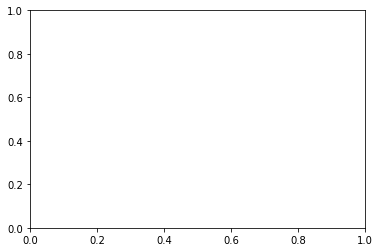

In [61]:
pcaVisualize2d(x_net,s_net)    

In [67]:
from sklearn import svm
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score, precision_score, recall_score, accuracy_score

In [89]:
x_net = np.load("x_net_pca10.npy")

In [90]:
clf= svm.SVC()


In [91]:
from sklearn.model_selection import train_test_split

In [92]:
x_train, x_validate, y_train, y_validate = train_test_split(x_net, s_net, test_size=0.3, random_state=42)

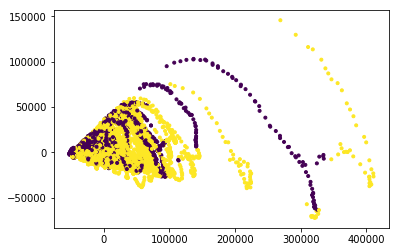

In [41]:
pcaVisualize2d(x_train,y_train)    

In [93]:
x_validate.shape

(5855, 10)

In [94]:
clf.fit(x_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [31]:
#clf.score(x_validate, y_validate)  #for pca=10

In [32]:
#clf.score(x_validate, y_validate)  #for pca=9

In [33]:
#clf.score(x_validate, y_validate)  #for pca=8

In [34]:
#clf.score(x_validate, y_validate)  #for pca=1

In [35]:
clf.score(x_validate, y_validate)  #for pca=2

0.8268099776921517

In [36]:
clf.score(x_validate, y_validate)  #for pca=12

0.8268099776921517

In [37]:
clf.score(x_validate, y_validate)  #for pca=13

0.8268099776921517

In [38]:
clf.score(x_validate, y_validate)  #for pca=14

0.8268099776921517

In [39]:
clf.score(x_validate, y_validate)  #for pca=15

0.8268099776921517

In [40]:
#clf.score(x_validate, y_validate)  #for pca=11

In [95]:
pred=clf.predict(x_validate)

In [96]:
print(np.array(pred).sum())
print(np.array(pred).shape[0])

5735
5855


In [82]:
print("Precision")
print(precision_score(y_validate, pred))

Precision
0.822131849315


In [83]:
print("Recall")
print(recall_score(y_validate,pred))

Recall
1.0


In [84]:
print("Accuracy")
print(accuracy_score(y_validate,pred))

Accuracy
0.831474345974


In [98]:
print(np.array(y_validate).sum())
print(np.array(y_validate).shape[0])

3991
5855


In [97]:
#Mirror Image Results   
print("Accuracy")
print(accuracy_score(y_validate,pred))
print("Recall")
print(recall_score(y_validate,pred))
print("Precision")
print(precision_score(y_validate,pred))

Accuracy
0.702134927412
Recall
1.0
Precision
0.695902353967


In [37]:
clf.score(x_train, y_train)

1.0